<h1 align=center> Tarea 7: Decision Trees y Random Forest
 </h1>

Integrantes:
- Axel Mondaca
- Sebastián Hernández

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score, accuracy_score



In [66]:
df = pd.read_csv('beans_Tarea7.csv')
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [20]:
df['Class'].value_counts()

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

In [71]:
#Normalizamos
scaler = StandardScaler()
numericas_cont = ['Area','Perimeter','MajorAxisLength','MinorAxisLength','AspectRation','Eccentricity','ConvexArea','EquivDiameter','Extent','Solidity','roundness','Compactness','ShapeFactor1','ShapeFactor2','ShapeFactor3','ShapeFactor4']
from sklearn.preprocessing import LabelEncoder 

categoricas = ['Class']

df_norm = pd.get_dummies(df, columns=categoricas,drop_first=True)
df_norm[numericas_cont] = scaler.fit_transform(df_norm[numericas_cont]) #Ahora utilizaremos el One Hot Enconding

class_name = ['Class_DERMASON','Class_SEKER','Class_SIRA','Class_HOROZ','Class_CALI','Class_BOMBAY']
name = ['DERMASON','SEKER','SIRA','HOROZ','CALI','BOMBAY']
X = df_norm.drop(class_name, axis=1)
y = df['Class']

In [68]:
#División de conjuntos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=254)

In [69]:
arbol = DecisionTreeClassifier(max_depth=3,
    min_samples_leaf=10,
    min_samples_split=20, random_state=254)
arbol.fit(X_train, y_train)
y_pred_arbol = arbol.predict(X_test)
másimportantes = pd.Series ( arbol.feature_importances_, index=X.columns).sort_values(ascending=False)
másimportantes

MajorAxisLength    0.268569
ShapeFactor1       0.267966
Compactness        0.237731
Perimeter          0.225733
AspectRation       0.000000
Eccentricity       0.000000
Area               0.000000
MinorAxisLength    0.000000
EquivDiameter      0.000000
ConvexArea         0.000000
Solidity           0.000000
Extent             0.000000
roundness          0.000000
ShapeFactor2       0.000000
ShapeFactor3       0.000000
ShapeFactor4       0.000000
dtype: float64

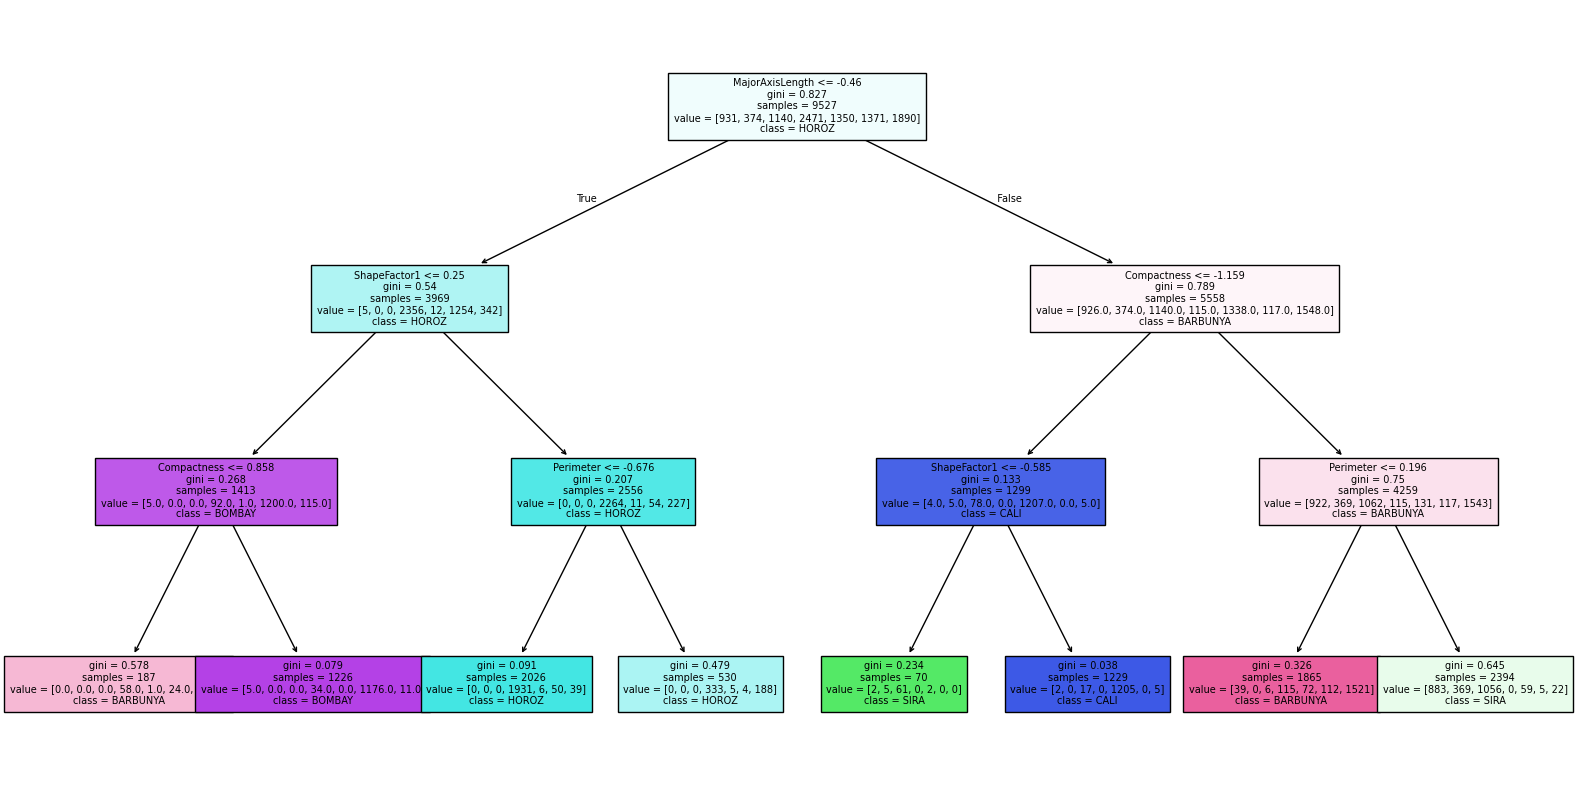

In [78]:
plt.figure(figsize=(20,10))
'DERMASON','SEKER','SIRA','HOROZ','CALI','BOMBAY'
plot_tree(arbol, feature_names=X.columns, class_names=['DERMASON', 'SEKER','SIRA', 'HOROZ', 'CALI', 'BOMBAY','BARBUNYA'], filled=True, fontsize=7)             
plt.show() 